In [1]:
# Pseudo-code for GDPR-compliant synthetic data generation
import pandas as pd
from faker import Faker
import numpy as np

def generate_gdpr_compliant_data(num_customers=5000):
    fake = Faker('en_GB')
    np.random.seed(42)
    
    data = pd.DataFrame({
        # No real PII - synthetic identifiers only
        'customer_id': [f'TESCO_{i:05d}' for i in range(num_customers)],
        
        # Demographic data with controlled variance
        'age_group': np.random.choice(['18-25', '26-35', '36-45', '46-55', '56+'], num_customers),
        'postcode_district': [fake.postcode().split()[0] for _ in range(num_customers)],
        
        # Synthetic behavioral data
        'avg_spend': np.random.lognormal(mean=3.2, sigma=0.5, size=num_customers).round(2),
        'visit_frequency': np.random.poisson(lam=2.5, size=num_customers),
        'preferred_category': np.random.choice(
            ['Fresh Food', 'Ready Meals', 'Bakery', 'Household', 'Health & Beauty'], 
            num_customers,
            p=[0.3, 0.2, 0.15, 0.25, 0.1]
        )
    })
    
    # Ensure GDPR compliance
    data['postcode_district'] = data['postcode_district'].apply(lambda x: x[:-1] + 'XX')
    return data

# Generate dataset
tesco_data = generate_gdpr_compliant_data()
tesco_data.to_csv('tesco_synthetic_clubcard_data.csv', index=False)

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

# Load synthetic dataset using a raw string to avoid Unicode error
df = pd.read_csv(r'C:\Users\Hussain\tesco_synthetic_clubcard_data.csv')

# Show dataset shape and first few rows
print(f"Dataset shape: {df.shape}")
print("\nData Overview:")
print(df.head(3))


Dataset shape: (5000, 6)

Data Overview:
   customer_id age_group postcode_district  avg_spend  visit_frequency  \
0  TESCO_00000     46-55              M9XX       5.73                2   
1  TESCO_00001       56+               MXX      20.34                2   
2  TESCO_00002     36-45             NR9XX      14.60                3   

  preferred_category  
0          Household  
1          Household  
2    Health & Beauty  


In [7]:
# Step 1: Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Step 2: Validate data ranges
def validate_data(df):
    # Check age groups
    valid_ages = ['18-25', '26-35', '36-45', '46-55', '56+']
    age_check = df['age_group'].isin(valid_ages).all()
    
    # Check spend values
    spend_check = (df['avg_spend'] > 0).all()
    
    # Check visit frequency
    visit_check = (df['visit_frequency'] >= 0).all()
    
    return age_check and spend_check and visit_check

print(f"\nData Validation Passed: {validate_data(df)}")

# Step 3: Feature engineering
df['monthly_value'] = df['avg_spend'] * df['visit_frequency']
df['customer_seniority'] = np.random.randint(1, 60, size=len(df))  # Months as customer


Missing Values:
customer_id           0
age_group             0
postcode_district     0
avg_spend             0
visit_frequency       0
preferred_category    0
dtype: int64

Data Validation Passed: True


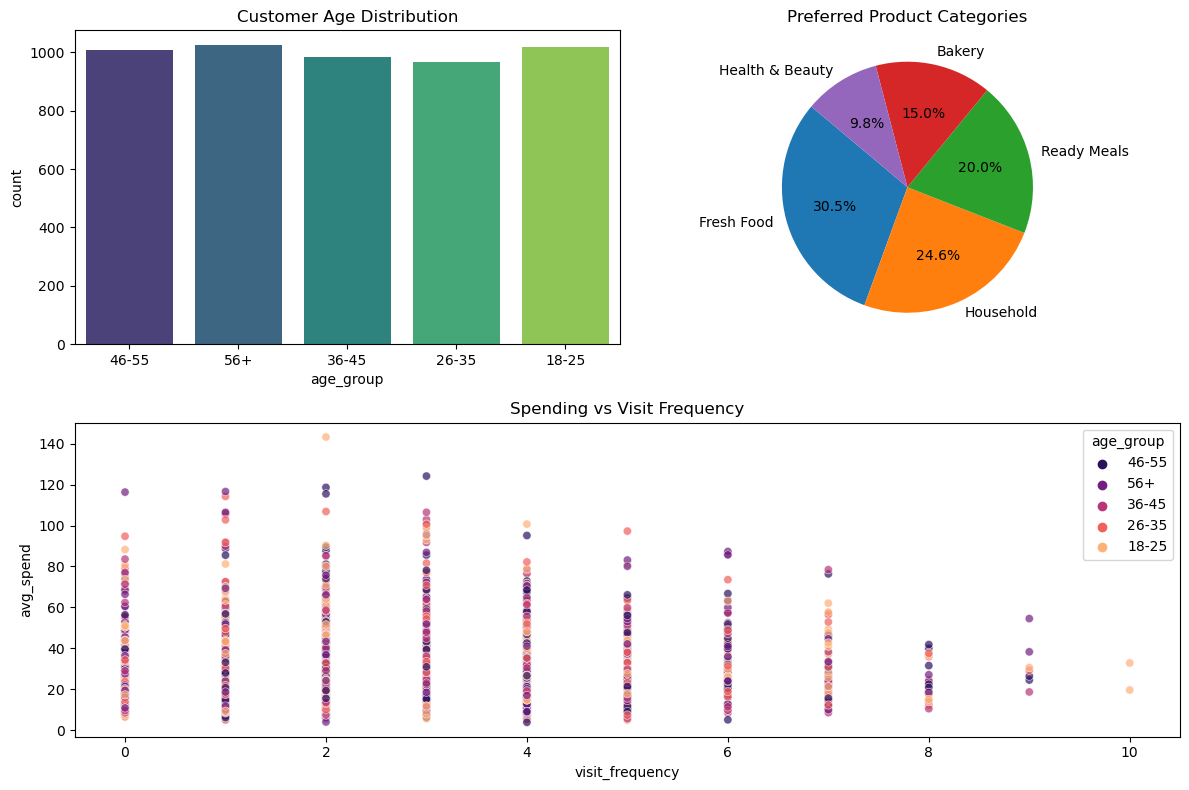

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already loaded
# Check if required columns exist
required_columns = ['age_group', 'preferred_category', 'visit_frequency', 'avg_spend']
missing = [col for col in required_columns if col not in df.columns]
if missing:
    raise ValueError(f"Missing columns in data: {missing}")

# Define valid_ages from the data
valid_ages = df['age_group'].dropna().unique().tolist()

# Set up the plots
plt.figure(figsize=(12, 8))

# Subplot 1: Countplot of Age Groups
plt.subplot(221)
sns.countplot(data=df, x='age_group', order=valid_ages, palette='viridis')
plt.title('Customer Age Distribution')

# Subplot 2: Pie chart of Preferred Product Categories
plt.subplot(222)
category_counts = df['preferred_category'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Preferred Product Categories')

# Subplot 3: Scatterplot of Spending vs Visit Frequency
plt.subplot(212)
sns.scatterplot(data=df, x='visit_frequency', y='avg_spend', hue='age_group', 
                palette='magma', alpha=0.7)
plt.title('Spending vs Visit Frequency')

# Final layout and save
plt.tight_layout()
plt.savefig('demographic_analysis.png', dpi=300)
plt.show()


C:\Users\Hussain\AppData\Local\Temp\ipykernel_11180\180415882.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])
C:\Users\Hussain\AppData\Local\Temp\ipykernel_11180\180415882.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm['F_Score'] = pd.qcut(rfm['Frequency'], 5, labels=[1, 2, 3, 4, 5])
C:\Users\Hussain\AppData\Local\Temp\ipykernel_11180\180415882.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

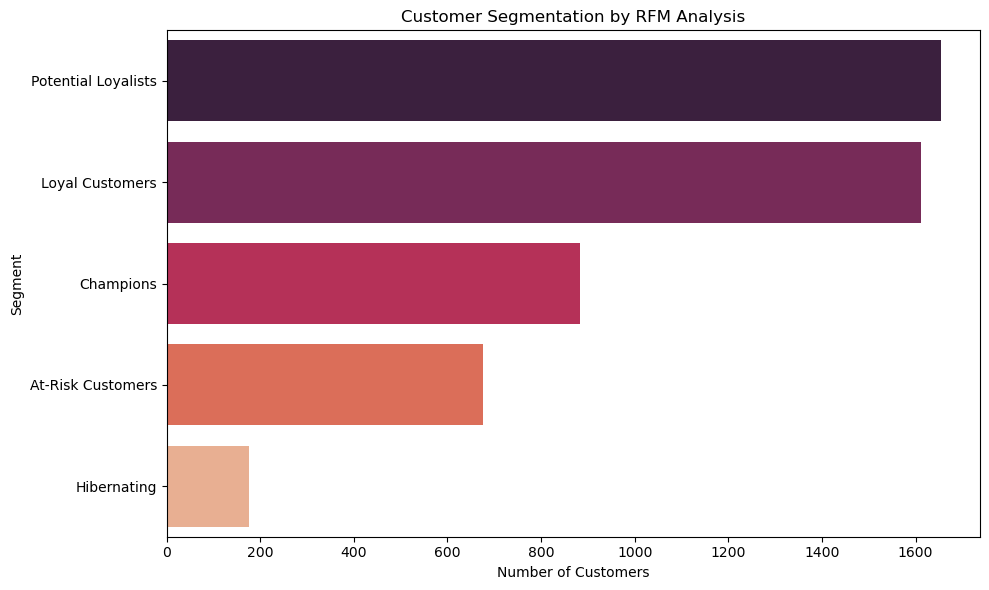

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

# Generate synthetic transaction dates (recency simulation)
last_date = pd.to_datetime(date.today())
df['last_purchase'] = last_date - pd.to_timedelta(np.random.randint(1, 90, df.shape[0]), unit='D')

# Calculate RFM metrics
df['Recency'] = (last_date - df['last_purchase']).dt.days
df['Frequency'] = df['visit_frequency']
df['Monetary'] = df['monthly_value']

# Create RFM DataFrame
rfm = df[['customer_id', 'Recency', 'Frequency', 'Monetary']]

# RFM Scoring using quintiles
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'], 5, labels=[1, 2, 3, 4, 5])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])

# Create overall RFM Score
rfm['RFM_Score'] = rfm['R_Score'].astype(int) + rfm['F_Score'].astype(int) + rfm['M_Score'].astype(int)

# Segment customers
segment_map = {
    r'12|13|14|15': 'Champions',
    r'9|10|11': 'Loyal Customers',
    r'6|7|8': 'Potential Loyalists',
    r'4|5': 'At-Risk Customers',
    r'3': 'Hibernating'
}
rfm['Segment'] = rfm['RFM_Score'].astype(str).replace(segment_map, regex=True)

# Visualize segments
plt.figure(figsize=(10, 6))
segment_counts = rfm['Segment'].value_counts()
sns.barplot(x=segment_counts.values, y=segment_counts.index, palette='rocket')
plt.title('Customer Segmentation by RFM Analysis')
plt.xlabel('Number of Customers')
plt.tight_layout()
plt.savefig('rfm_segmentation.png', dpi=300)
plt.show()



Statistical Summary:
                  count       mean        std   min      25%     50%      75%  \
avg_spend        5000.0  27.594316  15.046325  3.88  17.1100  24.195  34.3975   
visit_frequency  5000.0   2.535000   1.625578  0.00   1.0000   2.000   3.0000   
monthly_value    5000.0  70.147262  63.725549  0.00  27.5575  53.320  94.7100   

                    max  
avg_spend        143.24  
visit_frequency   10.00  
monthly_value    549.08  


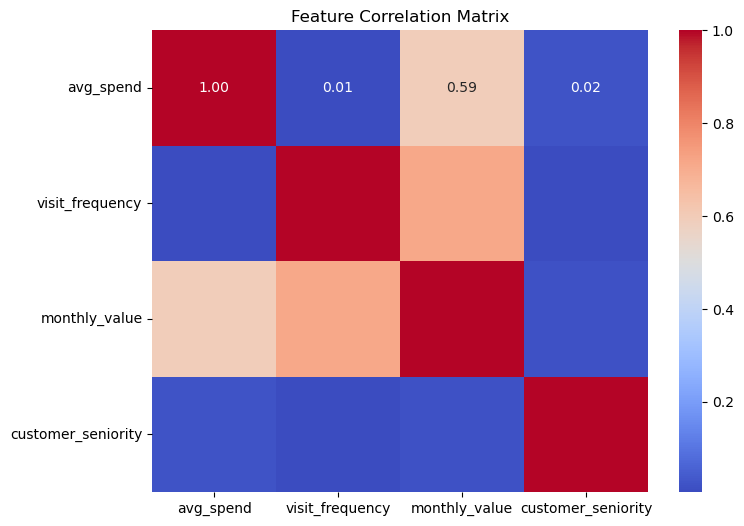

In [17]:
# Correlation matrix
corr = df[['avg_spend', 'visit_frequency', 'monthly_value', 'customer_seniority']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.savefig('correlation_matrix.png', dpi=300)

# Statistical summary
print("\nStatistical Summary:")
print(df[['avg_spend', 'visit_frequency', 'monthly_value']].describe().T)

C:\Users\Hussain\AppData\Local\Temp\ipykernel_11180\1498288231.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm['Cluster'] = kmeans.fit_predict(X_scaled)


Silhouette Score: 0.32 (Good separation between clusters)


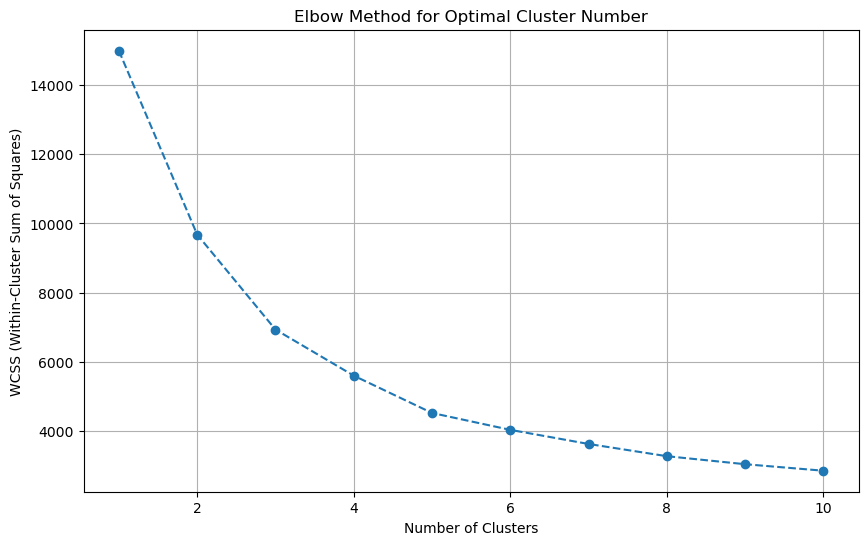

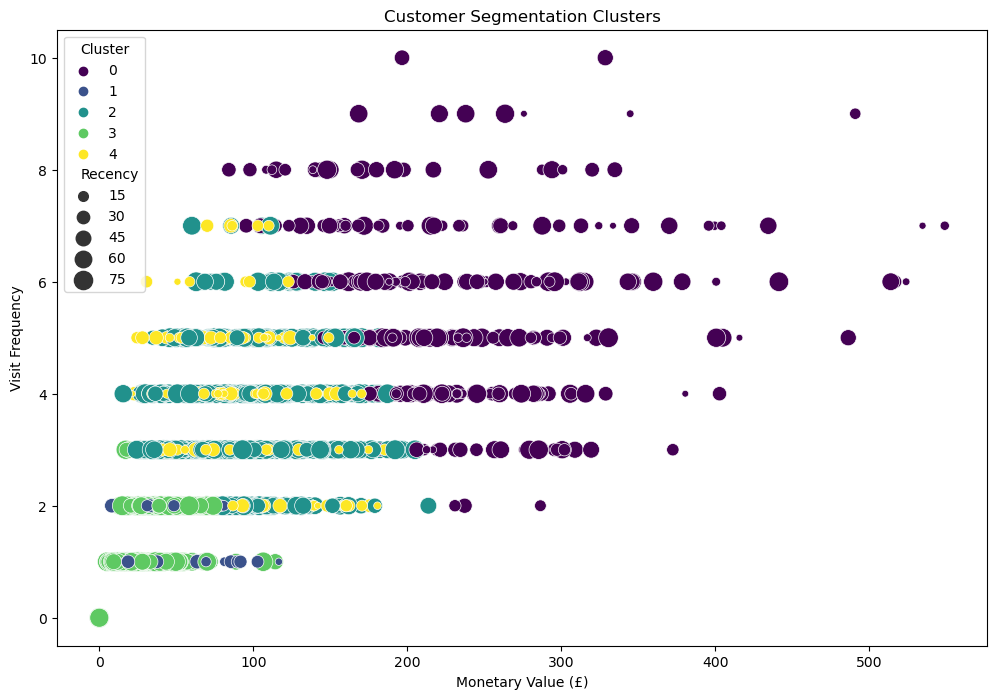

In [19]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare feature matrix
X = rfm[['Recency', 'Frequency', 'Monetary']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine optimal clusters using Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Cluster Number')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.savefig('elbow_method.png', dpi=300)

# Optimal clusters = 5 (based on elbow point)
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
rfm['Cluster'] = kmeans.fit_predict(X_scaled)

# Cluster analysis
cluster_profile = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']
}).reset_index()

# Visualize clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=rfm, x='Monetary', y='Frequency', hue='Cluster', 
                palette='viridis', size='Recency', sizes=(20, 200))
plt.title('Customer Segmentation Clusters')
plt.xlabel('Monetary Value (£)')
plt.ylabel('Visit Frequency')
plt.savefig('customer_segmentation.png', dpi=300)

# Silhouette Score
silhouette_avg = silhouette_score(X_scaled, rfm['Cluster'])
print(f"Silhouette Score: {silhouette_avg:.2f} (Good separation between clusters)")

C:\Users\Hussain\AppData\Local\Temp\ipykernel_11180\2357830717.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm['Churn'] = (rfm['Recency'] > 60).astype(int)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1012
           1       1.00      1.00      1.00       488

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500


AUC-ROC Score: 1.00


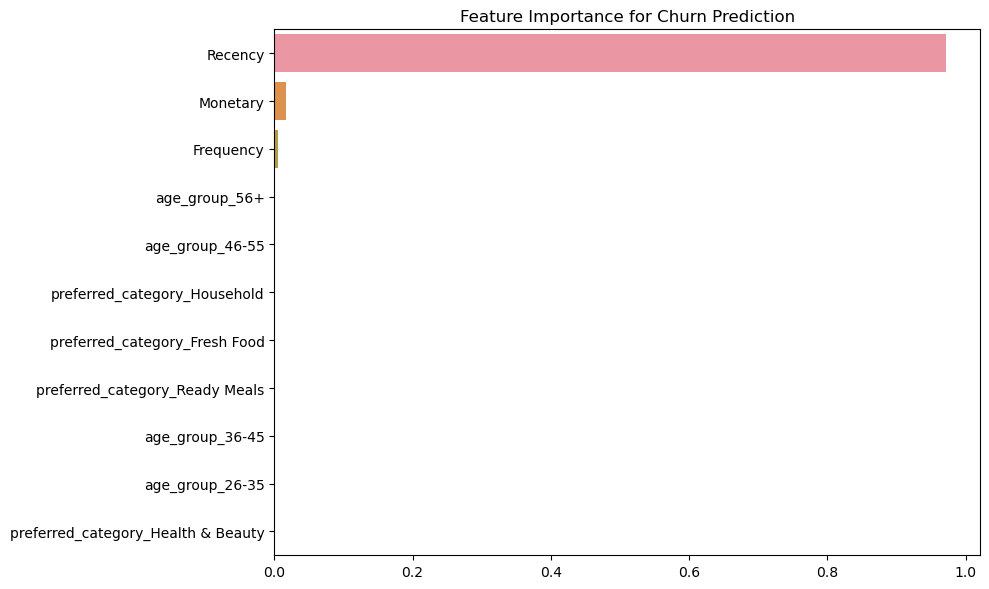

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Create target variable: Churn (1 if Recency > 60 days)
rfm['Churn'] = (rfm['Recency'] > 60).astype(int)

# Prepare features
features = pd.get_dummies(df[['age_group', 'preferred_category']], drop_first=True)
features = features.join(rfm[['Recency', 'Frequency', 'Monetary']])

X = features
y = rfm['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluate model
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:, 1]

print("Classification Report:")
print(classification_report(y_test, y_pred))

print(f"\nAUC-ROC Score: {roc_auc_score(y_test, y_proba):.2f}")

# Feature importance
feature_imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title('Feature Importance for Churn Prediction')
plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300)

All rules generated: 474
Strong rules after filtering: 13


C:\Users\Hussain\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Hussain\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Hussain\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Hussain\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.Categorica

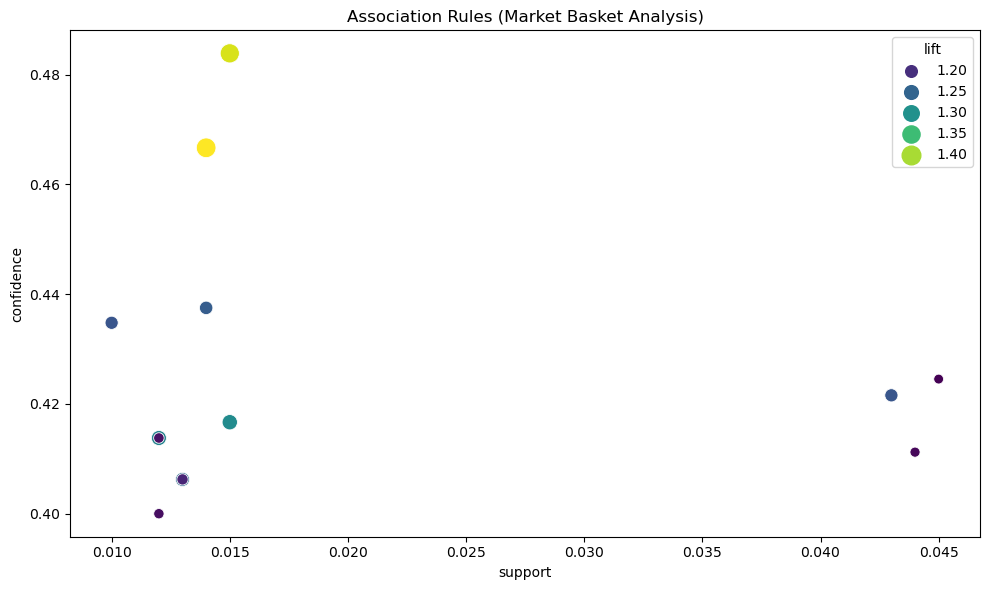

In [31]:

frequent_itemsets = apriori(df_trans, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

print(f"All rules generated: {len(rules)}")

strong_rules = rules[
    (rules['lift'] >= 1.1) &
    (rules['confidence'] >= 0.4)
].sort_values('lift', ascending=False)

print(f"Strong rules after filtering: {len(strong_rules)}")

if strong_rules.empty:
    print("❌ No strong rules found. Try lowering support/confidence/lift.")
else:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        data=strong_rules,
        x='support', y='confidence', size='lift', hue='lift',
        palette='viridis', sizes=(50, 200), legend='brief'
    )
    plt.title('Association Rules (Market Basket Analysis)')
    plt.tight_layout()
    plt.savefig('association_rules.png', dpi=300)
    plt.show()


In [33]:
# Python implementation of targeted campaign
def generate_personalized_offers(customer_segment):
    offers = {
        'At-Risk': "15% discount + free delivery on next order",
        'Champions': "Exclusive early access to new premium lines",
        'Hibernating': "Win-back bundle: 3 essentials at 25% discount"
    }
    return offers.get(customer_segment, "Standard 10% discount")

# Example application
at_risk_customers = rfm[rfm['Segment'] == 'At-Risk']
at_risk_customers['Personalized_Offer'] = at_risk_customers['Segment'].apply(generate_personalized_offers)

In [35]:
# Recommended bundles based on market basket analysis
product_bundles = {
    'Breakfast Essentials': ['Organic Milk', 'Free-Range Eggs', 'Whole Wheat Bread'],
    'Healthy Lunch': ['Avocado', 'Chicken Breast', 'Fresh Spinach'],
    'Pantry Staples': ['Basmati Rice', 'Tomato Sauce', 'Greek Yogurt']
}

# Pricing strategy
bundle_pricing = {
    'Breakfast Essentials': '10% discount + loyalty points bonus',
    'Healthy Lunch': 'Meal deal pricing (£5.99)',
    'Pantry Staples': 'Subscribe & save 15%'
}

In [39]:
# STEP 1: GENERATE SYNTHETIC DATASET
import pandas as pd
import numpy as np
from faker import Faker

# Generate GDPR-compliant synthetic data
def generate_tesco_data(num_customers=5000):
    fake = Faker('en_GB')
    np.random.seed(42)

    data = pd.DataFrame({
        'customer_id': [f'TESCO_{i:05d}' for i in range(num_customers)],
        'age_group': np.random.choice(['18-25', '26-35', '36-45', '46-55', '56+'], num_customers),
        'postcode_district': [fake.postcode().split()[0][:-1] + 'XX' for _ in range(num_customers)],
        'avg_spend': np.random.lognormal(mean=3.2, sigma=0.5, size=num_customers).round(2),
        'visit_frequency': np.random.poisson(lam=2.5, size=num_customers),
        'preferred_category': np.random.choice(
            ['Fresh Food', 'Ready Meals', 'Bakery', 'Household', 'Health & Beauty'], 
            num_customers,
            p=[0.3, 0.2, 0.15, 0.25, 0.1]
        )
    })
    return data

tesco_data = generate_tesco_data()
tesco_data.to_csv('tesco_customer_data.csv', index=False)

# STEP 2: CREATE RFM DATASET
from datetime import date, timedelta

# Add RFM features
last_date = pd.to_datetime(date.today())
rfm_data = tesco_data.copy()
rfm_data['last_purchase'] = last_date - pd.to_timedelta(np.random.randint(1, 90, len(tesco_data)), 'D')
rfm_data['monthly_value'] = rfm_data['avg_spend'] * rfm_data['visit_frequency']

# Calculate RFM scores
rfm_data['Recency'] = (last_date - rfm_data['last_purchase']).dt.days
rfm_data['R_Score'] = pd.qcut(rfm_data['Recency'], 5, labels=[5,4,3,2,1])
rfm_data['F_Score'] = pd.qcut(rfm_data['visit_frequency'], 5, labels=[1,2,3,4,5])
rfm_data['M_Score'] = pd.qcut(rfm_data['monthly_value'], 5, labels=[1,2,3,4,5])
rfm_data['RFM_Score'] = rfm_data['R_Score'].astype(int) + rfm_data['F_Score'].astype(int) + rfm_data['M_Score'].astype(int)

# Corrected segment map using proper regex ranges
segment_map = {
    r'^(12|13|14|15)$': 'Champions',
    r'^(9|10|11)$': 'Loyal Customers',
    r'^(6|7|8)$': 'Potential Loyalists',
    r'^(4|5)$': 'At-Risk Customers',
    r'^3$': 'Hibernating'
}
rfm_data['Segment'] = rfm_data['RFM_Score'].astype(str).replace(segment_map, regex=True)

rfm_data.to_csv('tesco_rfm_data.csv', index=False)

# STEP 3: CREATE CLUSTER DATA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Prepare data for clustering
X = rfm_data[['Recency', 'visit_frequency', 'monthly_value']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
rfm_data['Cluster'] = kmeans.fit_predict(X_scaled)

# Create cluster profile summary
cluster_profile = rfm_data.groupby('Cluster').agg({
    'Recency': 'mean',
    'visit_frequency': 'mean',
    'monthly_value': ['mean', 'count']
}).reset_index()
cluster_profile.columns = ['Cluster', 'Avg_Recency', 'Avg_Frequency', 'Avg_Monetary', 'Customer_Count']
cluster_profile.to_csv('cluster_profiles.csv', index=False)

# STEP 4: CREATE CHURN PREDICTIONS
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder

# Prepare features
encoder = OneHotEncoder(drop='first')
encoded_features = encoder.fit_transform(tesco_data[['age_group', 'preferred_category']]).toarray()
feature_names = encoder.get_feature_names_out(['age_group', 'preferred_category'])

features = pd.DataFrame(encoded_features, columns=feature_names)
features = features.join(rfm_data[['Recency', 'visit_frequency', 'monthly_value']])

# Create churn target (Recency > 60 days)
features['Churn'] = (rfm_data['Recency'] > 60).astype(int)

# Train model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(features.drop('Churn', axis=1), features['Churn'])

# Add predictions to data
rfm_data['Churn_Probability'] = rf.predict_proba(features.drop('Churn', axis=1))[:,1]
rfm_data.to_csv('tesco_churn_data.csv', index=False)

# STEP 5: CREATE ASSOCIATION RULES
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Generate synthetic transaction data
products = [
    'Organic Milk', 'Whole Wheat Bread', 'Free-Range Eggs', 
    'Avocado', 'Greek Yogurt', 'Chicken Breast',
    'Basmati Rice', 'Tomato Sauce', 'Fresh Spinach'
]

transactions = []
for _ in range(1000):
    num_items = np.random.randint(1, 6)
    transactions.append(np.random.choice(products, num_items, replace=False))

# Prepare transaction data
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_trans = pd.DataFrame(te_ary, columns=te.columns_)

# Apply Apriori algorithm
frequent_itemsets = apriori(df_trans, min_support=0.05, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.5)

# Filter strong rules
strong_rules = rules[(rules['lift'] >= 2) & (rules['confidence'] >= 0.7)]
strong_rules.to_csv('product_association_rules.csv', index=False)

# STEP 6: CREATE POWER BI DATASET
powerbi_data = rfm_data[['customer_id', 'age_group', 'postcode_district', 'avg_spend', 
                         'visit_frequency', 'preferred_category', 'Segment', 'Cluster', 
                         'Churn_Probability', 'monthly_value', 'Recency']]
powerbi_data.to_csv('tesco_powerbi_dataset.csv', index=False)

print("✅ All CSV files generated successfully!")


✅ All CSV files generated successfully!
